In [11]:
import numpy as np
import pandas as pd
from binance.client import Client
import matplotlib.pyplot as plt

In [12]:
def get_data(api_key, api_secret, initial_date, final_date, pair, time_frame):
    
    '''Returns a DataFrame that contains all the information about the 
       historical price of a pair of cryptocurrencies '''
    
    client = Client(api_key, api_secret)
    klines = client.get_historical_klines(pair , time_frame, initial_date, final_date)
    information = np.array(klines, dtype=float)
    df = pd.DataFrame(information, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
             'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
             'Taker buy quote asset volume', 'Can be ignored'])
    df['Open time'] = pd.to_datetime(df['Open time'], utc=True, unit='ms')
    df['Close time'] = pd.to_datetime(df['Close time'], utc=True, unit='ms')
    #df.isnull().values.any()
    return df

def plot_figure(label1, label2):
    '''Graph labe1 as a function of label2'''
    plt.figure(figsize=(20,8))
    plt.grid(True)
    plt.plot(label1, label2)
    plt.xlabel(label1.name)
    plt.ylabel(label2.name)
    #plt.title('Close Prices 2017-12-01 and 2018-01-01')
    plt.show()

In [15]:
api_key = ''
api_secret = ''
initial_date ='1 Jan, 2023'
final_date ='15 jun, 2023'
pair = "BTCUSDT"
time_frame = Client.KLINE_INTERVAL_1HOUR

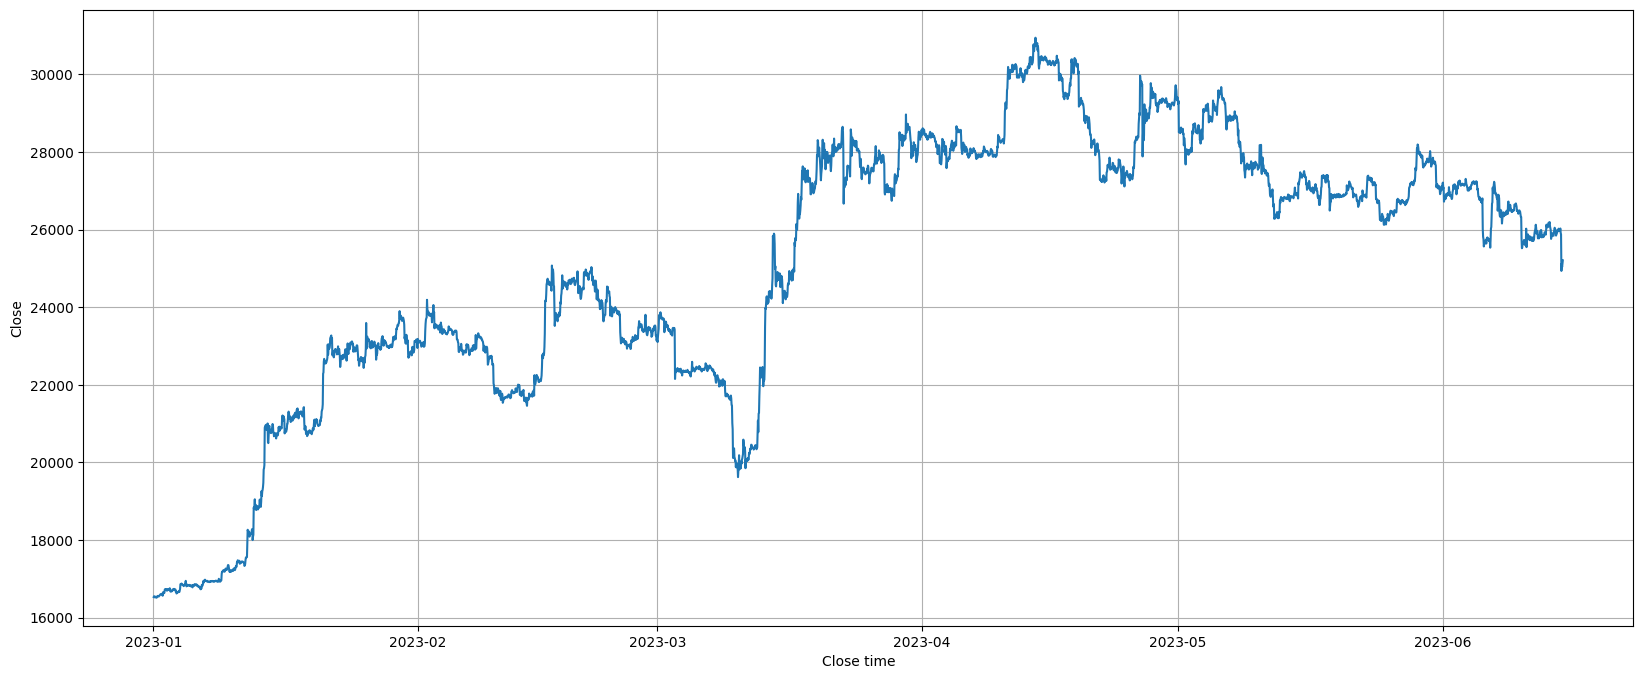

In [18]:
data = get_data(api_key, api_secret, initial_date, final_date, pair, time_frame)
plot_figure(data['Close time'], data['Close'])